In [352]:
# check if the variables are correlated with each other

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#df = pd.read_csv('data/combined.csv',encoding='latin-1',keep_default_na=False,na_values=['..','#N/A'])
df = pd.read_csv('data/country.csv',encoding='latin-1',keep_default_na=False,na_values=['..','#N/A'])
df = df.drop(columns=['Numeric','Lat','Long'])
df = df.rename(columns={'gdp': 'GDP'})
print(df)

                      Country alpha-2 Alpha-3 code           GDP  \
0                 Afghanistan      AF          AFG    524.162881   
1                     Albania      AL          ALB   5284.380184   
2                     Algeria      DZ          DZA   4114.715061   
3              American Samoa      AS          ASM  11466.690710   
4                     Andorra      AD          AND  41793.055260   
..                        ...     ...          ...           ...   
211  Virgin Islands (British)      VG          VGB           NaN   
212     Virgin Islands (U.S.)      VI          VIR           NaN   
213                     Yemen      YE          YEM    968.159048   
214                    Zambia      ZM          ZMB   1556.334482   
215                  Zimbabwe      ZW          ZWE   1683.740577   

     Population (2019)  Literacy Rate Age 15+ (2018)  Internet Rate (2017)  \
0           38041754.0                     43.019718             11.447688   
1            2854191.0     

In [353]:
corr = df.corr()

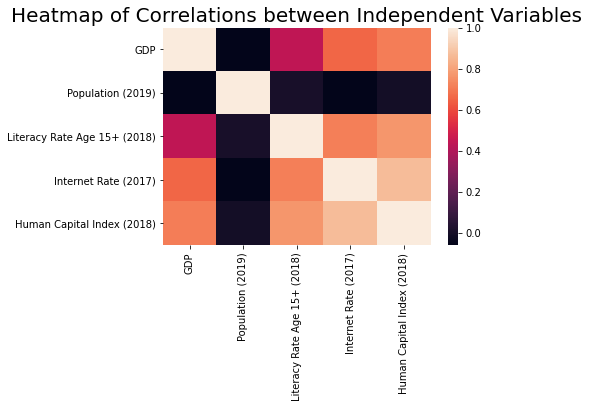

In [354]:
#Country correlations
import seaborn as sns
ax = plt.axes()
sns.heatmap(corr, ax=ax)

ax.set_title('Heatmap of Correlations between Independent Variables', fontsize=20)
plt.show()

In [355]:
pairwise_df = pd.read_csv('data/pairwise.csv',encoding='latin-1')
pairwise_df_norank = pairwise_df.drop(columns=['user_loc','fr_loc','scaled_sci','sci_ranked','population_diff_ranked','trade_ranked'])
print(pairwise_df_norank)

       migrants_from_fr      gdp_diff  population_diff  literacy_dif  \
0                   NaN      0.000000              0.0           NaN   
1                   NaN  27112.375540        9673411.0           NaN   
2                   NaN  38554.976170        6916338.0           NaN   
3                   NaN  39618.866070        6812798.0           NaN   
4                   NaN  40549.709690       22054766.0           NaN   
...                 ...           ...              ...           ...   
34220               NaN           NaN              NaN           NaN   
34221            7872.0    878.599360       56063740.0           NaN   
34222            2806.0   3939.094354       15366500.0      4.779305   
34223           13413.0   3811.688259       12150938.0           NaN   
34224               NaN      0.000000              0.0      0.000000   

       internet_diff  hci_diff      distance  trade  
0           0.000000  0.000000      0.000095    NaN  
1                NaN  0.097

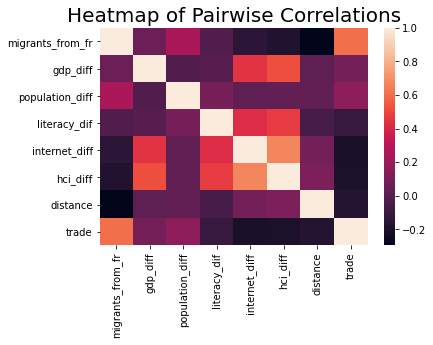

In [356]:
#Pairwise correlation heatmap

corr2 = pairwise_df_norank.corr(method='spearman')
ax = plt.axes()
sns.heatmap(corr2, ax=ax)
ax.set_title('Heatmap of Pairwise Correlations', fontsize=20)
plt.show()

In [357]:
#Final correlation results

pairwise_df = pairwise_df.drop(columns=['user_loc','fr_loc','sci_ranked','population_diff_ranked','trade_ranked'])
corr_matrix = pairwise_df.corr(method='spearman')
corr_matrix = corr_matrix.drop(['scaled_sci'])
#Sort by absolute value
corr_matrix = corr_matrix.reindex(corr_matrix.scaled_sci.abs().sort_values(ascending=False).index)
corr_matrix = corr_matrix.rename(columns={'scaled_sci':"Correlation with SCI"},index={'migrants_from_fr':'Migration','gdp_diff':'GDP Per Capita','population_diff':'Population','literacy_dif':'Literacy', 'internet_diff':'Internet Access','hci_diff':'Human Capital Index','trade':'Trade','distance':"Distance"})

print(corr_matrix[['Correlation with SCI']])



                     Correlation with SCI
distance                        -0.515530
Migration                        0.436900
Trade                            0.312518
Human Capital Index             -0.283469
Internet Access                 -0.208614
Population                      -0.136050
GDP Per Capita                   0.013357
Literacy                        -0.006493
